<h1> Zadanie 1 </h1>

In [2]:
import skimage as ski
import matplotlib.pyplot as plt 
import cv2
import numpy as np

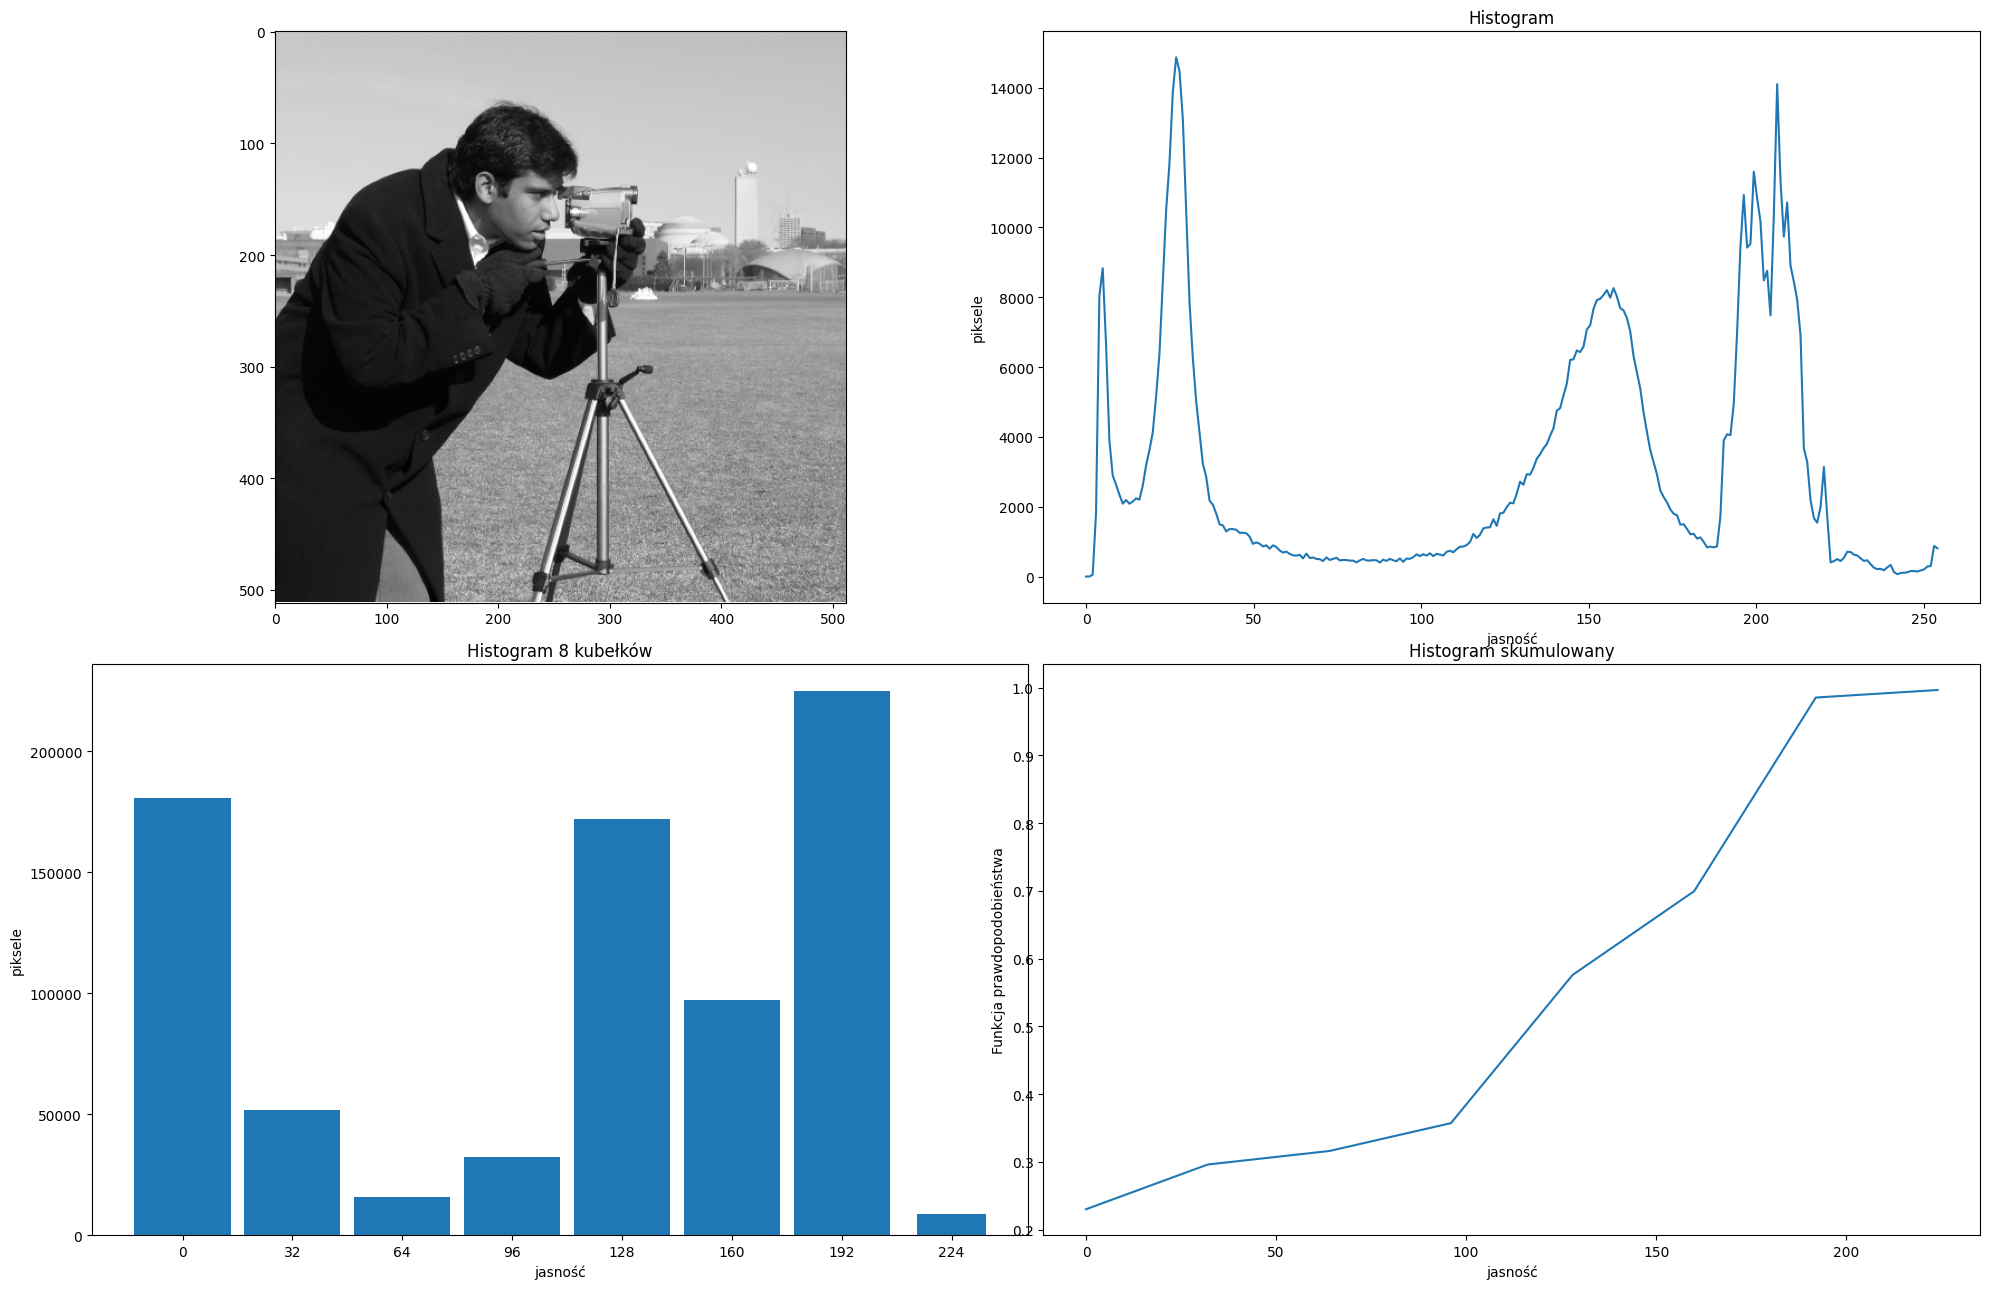

In [3]:
camera = ski.data.camera()
camera = cv2.cvtColor(camera, cv2.COLOR_GRAY2BGR)

hist , hist_camera = np.histogram(camera, bins=256, range=(0, 255))


plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
plt.imshow(camera)
plt.subplot(2,2,2)
plt.title("Histogram")
plt.ylabel("piksele")
plt.xlabel("jasność")
plt.plot(hist_camera[:-1], hist)


bins_range = [0,32,64,96,128,160,192,224,248]
hist , hist_camera = np.histogram(camera, bins=bins_range)


plt.subplot(2,2,3)
plt.title("Histogram 8 kubełków")
plt.ylabel("piksele")
plt.xlabel("jasność")
plt.xticks(bins_range)
plt.bar(bins_range[:-1], hist, width=np.diff(bins_range )-4)

plt.tight_layout()


plt.subplot(2,2,4)
plt.title("Histogram skumulowany")
plt.ylabel("Funkcja prawdopodobieństwa")
plt.xlabel("jasność")

total_pixels = camera.size
cumsum_hist = np.cumsum(hist)
y_axis = cumsum_hist / total_pixels

plt.plot(bins_range[:-1],y_axis )

plt.show()




<h1> Zadanie 2 </h1>






(512, 512, 3) 255 0


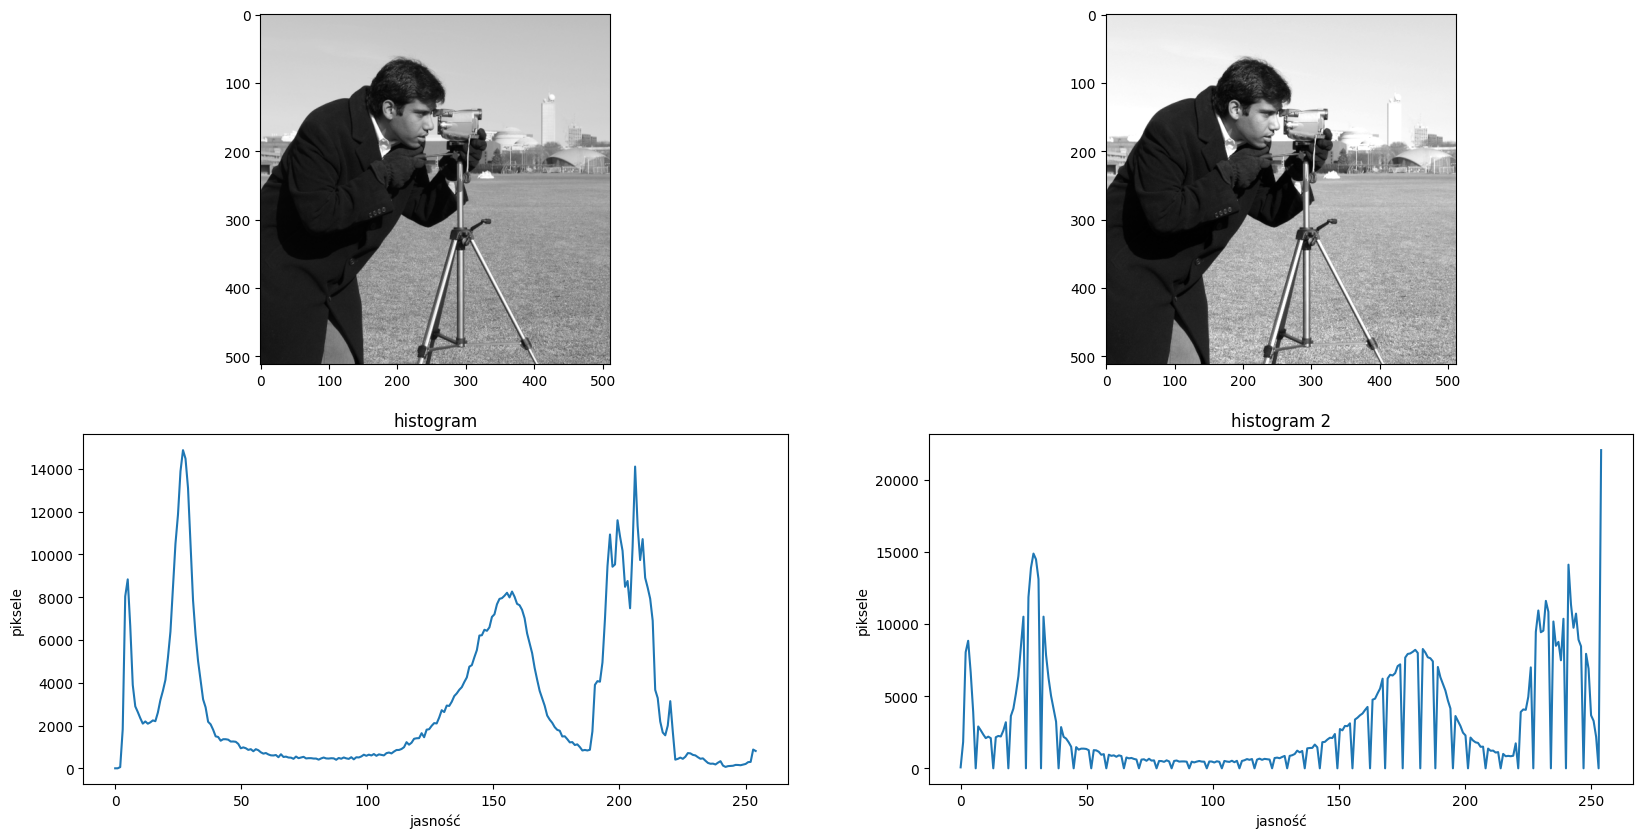

In [4]:
img = ski.data.camera()
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

plt.figure(figsize=(20,10))

a = 2
b = 218


plt.subplot(2,2,1)
plt.imshow(img)
print(img.shape,img.max(),img.min())

hist, hist_camera = np.histogram(img, bins=256, range=(0, 255))
plt.subplot(2,2,3)
plt.title("histogram")
plt.xlabel("jasność")
plt.ylabel("piksele")
plt.plot(hist_camera[:-1],hist)

img2 = ski.exposure.rescale_intensity(img,(a,b))
hist, hist_camera = np.histogram(img2, bins =256,range=(0,255))
plt.subplot(2,2,2)
plt.imshow(img2)

plt.subplot(2,2,4)
plt.title("histogram 2")
plt.xlabel("jasność")
plt.ylabel("piksele")
plt.plot(hist_camera[:-1],hist)

#print(hist_camera[:-1],hist)


<h1> Zadanie 2b </h1>

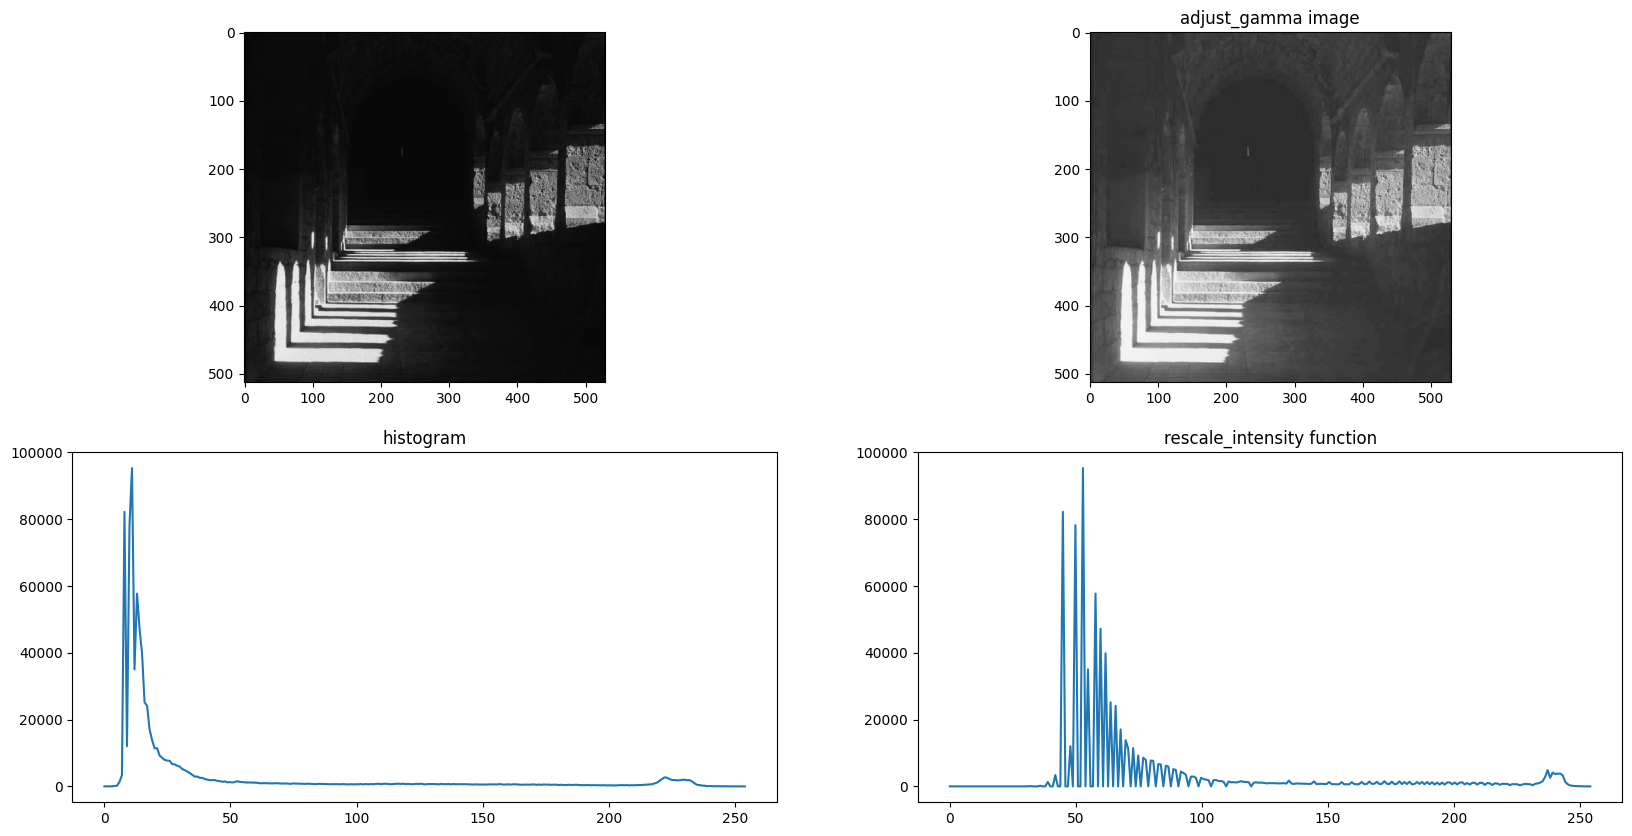

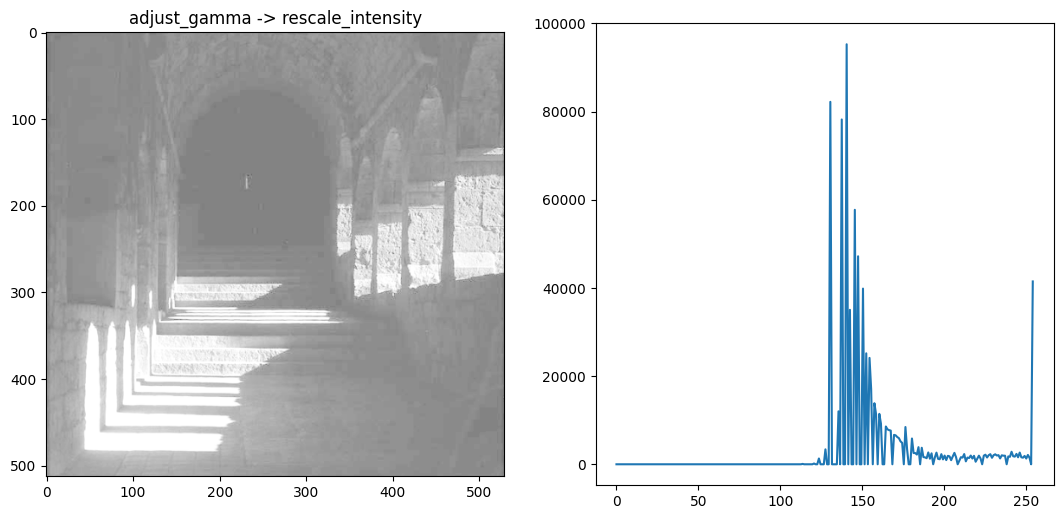

In [5]:
img = cv2.imread("dark_image.png")


hist , hist_dark = np.histogram(img, bins = 256, range=(0,255))


plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,3)
plt.title("histogram")
plt.plot(hist_dark[:-1],hist)


a = 4
b =  242
#rozjaśnienie obrazu odbywa sie poprzez wartość < 1
img = ski.exposure.adjust_gamma(img,0.5)
hist , hist_dark = np.histogram(img, bins = 256, range=(0,255))
plt.subplot(2,2,4)
plt.title("rescale_intensity function")
plt.plot(hist_dark[:-1],hist)


plt.subplot(2,2,2)
plt.title("adjust_gamma image")
plt.imshow(img)
plt.show()


plt.figure(figsize=(13,6))
# korekcja gamma, następnie zmiana skali
plt.subplot(1,2,1)
img = ski.exposure.adjust_gamma(img,0.4)
img2 = ski.exposure.rescale_intensity(img,(a,b))
hist , hist_dark = np.histogram(img2, bins = 256, range=(0,255))
plt.title("adjust_gamma -> rescale_intensity" )
plt.imshow(img2)

plt.subplot(1,2,2)
plt.plot(hist_dark[:-1],hist)
plt.show()



<h1> Zadanie 3 </h1>

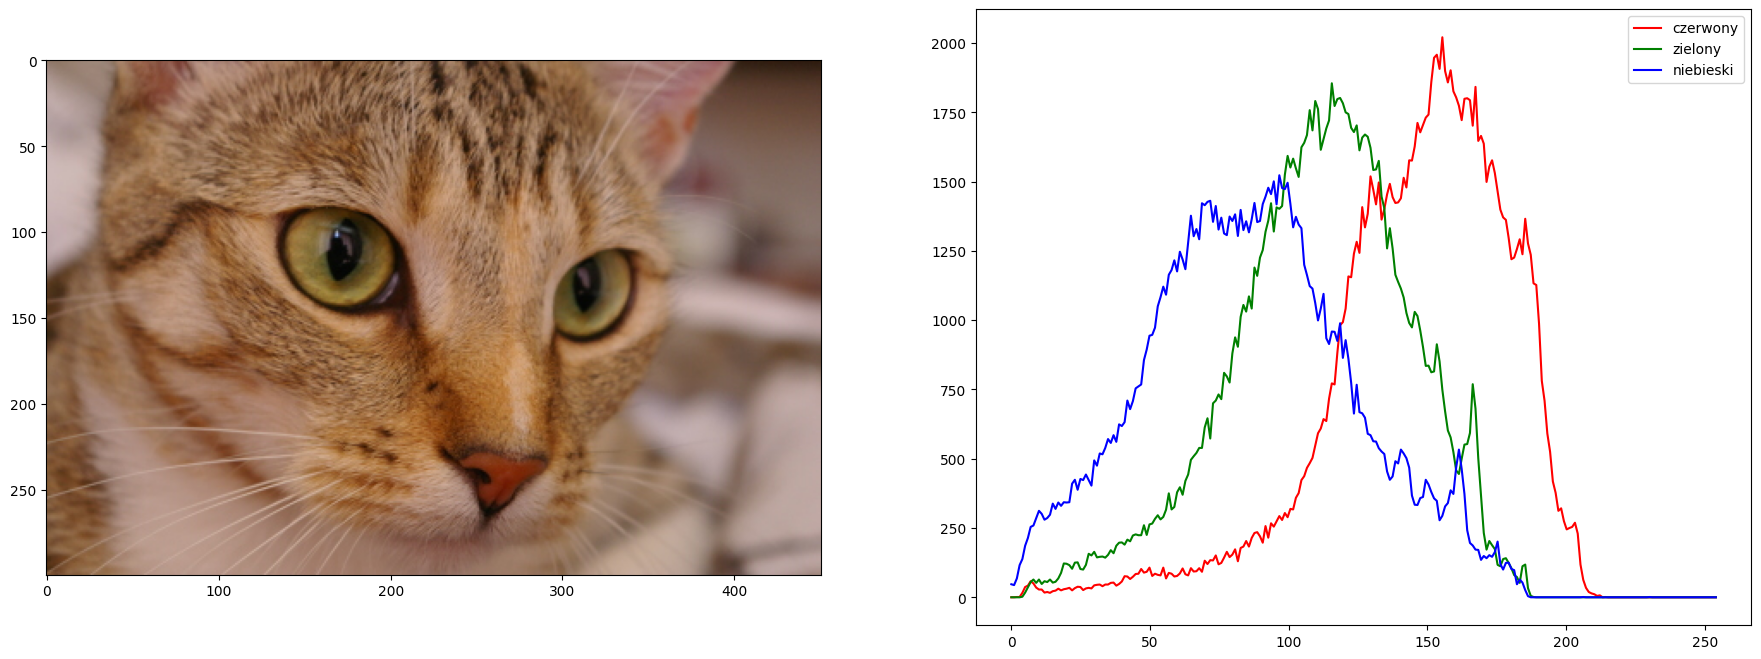

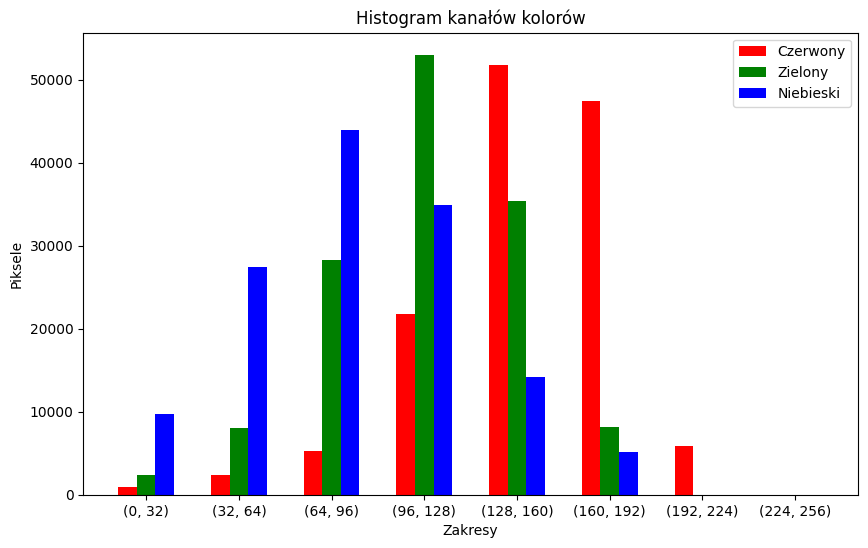

In [6]:
chelsea = ski.data.chelsea()
plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
plt.imshow(chelsea)
red_color = chelsea[:,:,0]
green_color = chelsea[:,:,1]
blue_color = chelsea[:,:,2]
hist_red , hist_color_r = np.histogram(red_color, bins = 256, range = (0,255))
hist_green , hist_color_g = np.histogram(green_color, bins = 256, range = (0,255))
hist_blue, hist_color_b = np.histogram(blue_color, bins = 256, range = (0,255))


plt.subplot(1,2,2)
plt.plot(hist_color_r[:-1],hist_red, label="czerwony", color="red")
plt.plot(hist_color_g[:-1],hist_green, label="zielony", color="green")
plt.plot(hist_color_b[:-1],hist_blue, label="niebieski", color="blue")

plt.legend()
plt.show()

bins_range = [0, 32, 64, 96, 128, 160, 192, 224, 256]
range_labels = ["(0, 32)", "(32, 64)", "(64, 96)", "(96, 128)", "(128, 160)", "(160, 192)", "(192, 224)", "(224, 256)"]


hist_red, _ = np.histogram(red_color, bins=bins_range)
hist_green, _ = np.histogram(green_color, bins=bins_range)
hist_blue, _ = np.histogram(blue_color, bins=bins_range)

bar_width = 0.20
index = np.arange(len(bins_range) - 1)

plt.figure(figsize=(10,6))
plt.bar(index - bar_width, hist_red, width=bar_width, color='red', label='Czerwony')
plt.bar(index, hist_green, width=bar_width, color='green', label='Zielony')
plt.bar(index + bar_width, hist_blue, width=bar_width, color='blue', label='Niebieski')

plt.xlabel('Zakresy')
plt.ylabel('Piksele')
plt.title('Histogram kanałów kolorów')
plt.xticks(index, range_labels)
plt.legend()


plt.show()




<h1> Zadanie 4 </h1>

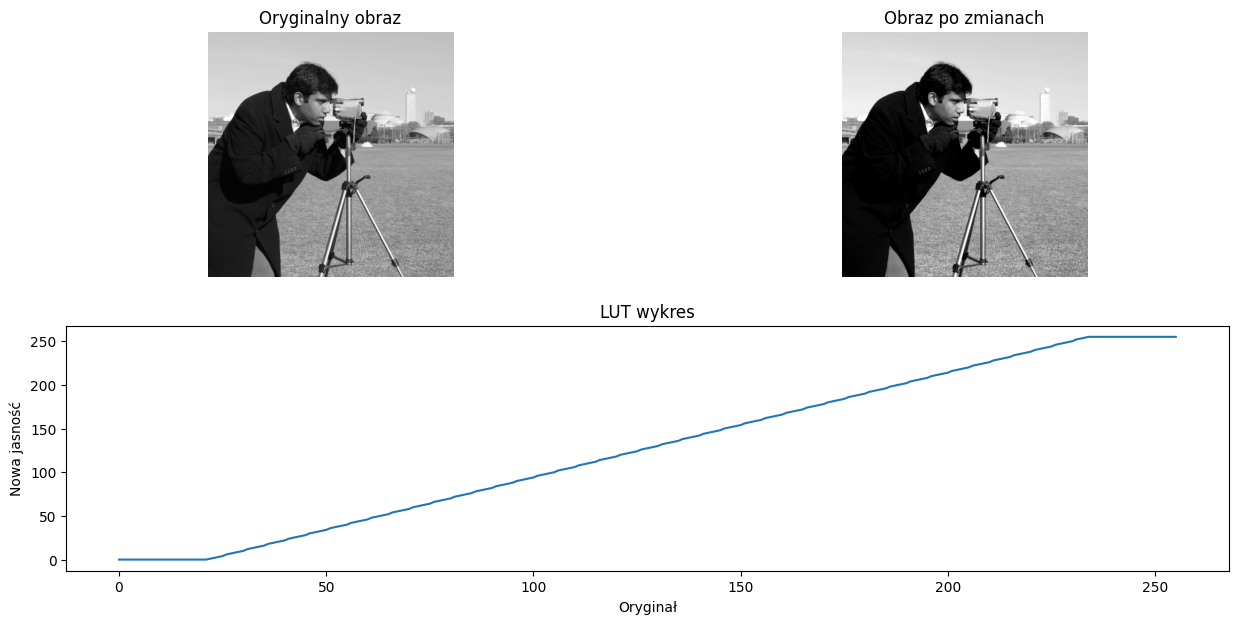

In [23]:
image = ski.data.camera()

a = 1.2
point = 128

def fun(x,a):
   return np.clip(np.round(a * (x - point) + point), 0, 255)


LUT = [fun(x, a) for x in range(256)]
image2 = np.take(LUT,image)

plt.figure(figsize=(15,7))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Obraz po zmianach')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.plot(LUT)
plt.title('LUT wykres')
plt.xlabel('Oryginał')
plt.ylabel('Nowa jasność')
plt.show()